**Regularization**

__규제가 필요한 이유__ <br>
선형모델의 비용함수는 RSS를 최소화하는 것만 고려했다. 그러다보니 학습데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽다. <br>
이를 반영해 **비용함수는 학습데이터의 잔차 오류값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.** 

__비용함수의 목표 : 회귀계수크기 제어 + 오류값 최소화__ <br>
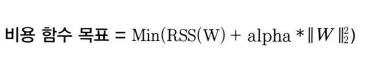

1. alpha 가 0(또는 매우 작은 값)이라면 비용함수 식은 기존과 동일한 Min(RSS(W)+0) <br>
2. alpha가 무한대(또는 매우 큰 값)이라면 비용함수 식은 RSS(W)에 비해 $alpha*||W||_2$이 너무 커지게 된다. <br>
-> 따라서, W의 값을 0 또는 매우 작게 만들어야 Cost가 최소화되는 비용함수 목표를 달성할 수 있다. 

즉, alpha값을 크게 하면 비용함수는 회귀계수 W의 값을 작게 해 과적합을 개선할 수 있으며, alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다. 

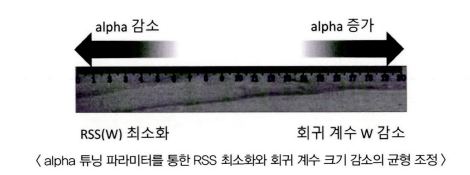

****************

## **Ridge Regualization**



### 1. 패키지 설치 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
bostonDF = pd.read_excel(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\2.Estimation\datasets\bostonhousingprice.xls')
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


|변수|설명|
|---|---|
|CRIM|지역별 범죄 발생률|
|ZN|25000평방피트를 초과하는 거주 지역의 비율|
|INDUS|비상업 지역 넓이 비율|
|CHAS|찰스강에 대한 더미변수 (강의 경계에 위치한 경우1, 아니면 0)|
|NOX|일산화질소 농도|
|RM|거주할 수 있는 방 개수|
|AGE|1940년 이전에 건축된 소유 주택의 비율|
|DIS|5개 주요 고용센터까지의 가중거리|
|RAD|고속도로 접근 용이도|
|TAX|10000달러당 재산세율|
|PTRATIO|지역의 교사와 학생 수 비율|
|B|지역의 흑인 거주 비율|
|LSTAT|하위 계층의 비율|
|MEDV|본인 소유의 주택 가격(중앙값)|

In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


> 결측치는 없는 것으로 확인

In [4]:
bostonDF.drop('CAT. MEDV', axis=1, inplace=True)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2. EDA

In [5]:
len(list(bostonDF.columns))

14

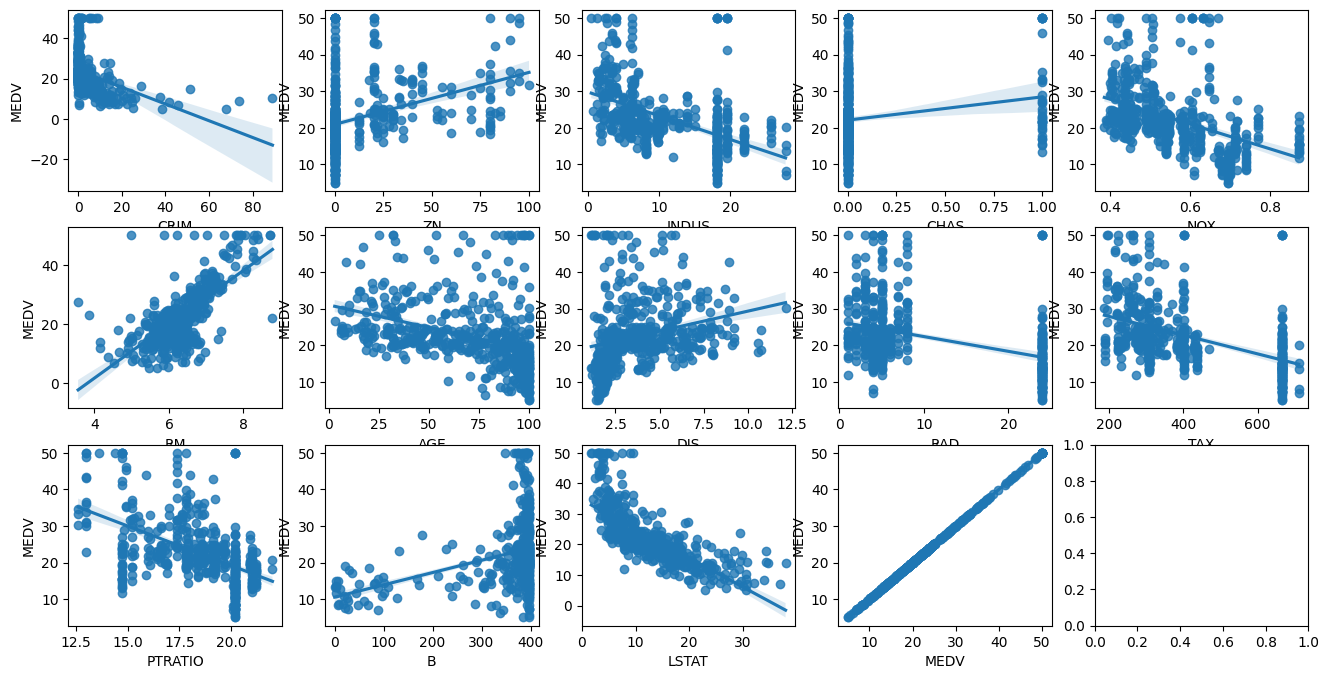

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=3)
for i, feature in enumerate(list(bostonDF.columns)):
    row = int(i/5)
    col = i%5
    sb.regplot(x=feature, y='MEDV', data=bostonDF, ax=axs[row][col])

> RM(+)과 LSTAT(-)의 MEDV(price) 영향도가 가장 두드러진다. 

### 3. 학습, 테스트 셋 분리

In [7]:
from sklearn.model_selection import train_test_split

y_target = bostonDF['MEDV']
X_data = bostonDF.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

### 4. 릿지 회귀 모델링 및 평가

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 fold의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 fold의 개별 평균 RMSE scores:{0:.3f}'.format(avg_rmse))

5 fold의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 fold의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 fold의 개별 평균 RMSE scores:5.518


> 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보인다. 

### 5. alpha값 변화시키면서 릿지회귀모델 평가

In [11]:
# 릿지에 사용될 alpha파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]


# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha:{0} 일때, 5fold의 평균 rmse:{1}'.format(alpha, avg_rmse))

alpha:0 일때, 5fold의 평균 rmse:5.828658946215807
alpha:0.1 일때, 5fold의 평균 rmse:5.788486627032413
alpha:1 일때, 5fold의 평균 rmse:5.652570965613547
alpha:10 일때, 5fold의 평균 rmse:5.518166280868973
alpha:100 일때, 5fold의 평균 rmse:5.329589628472148


> alpha=100일때 평균RMSE가 5.32로 가장 좋다. 

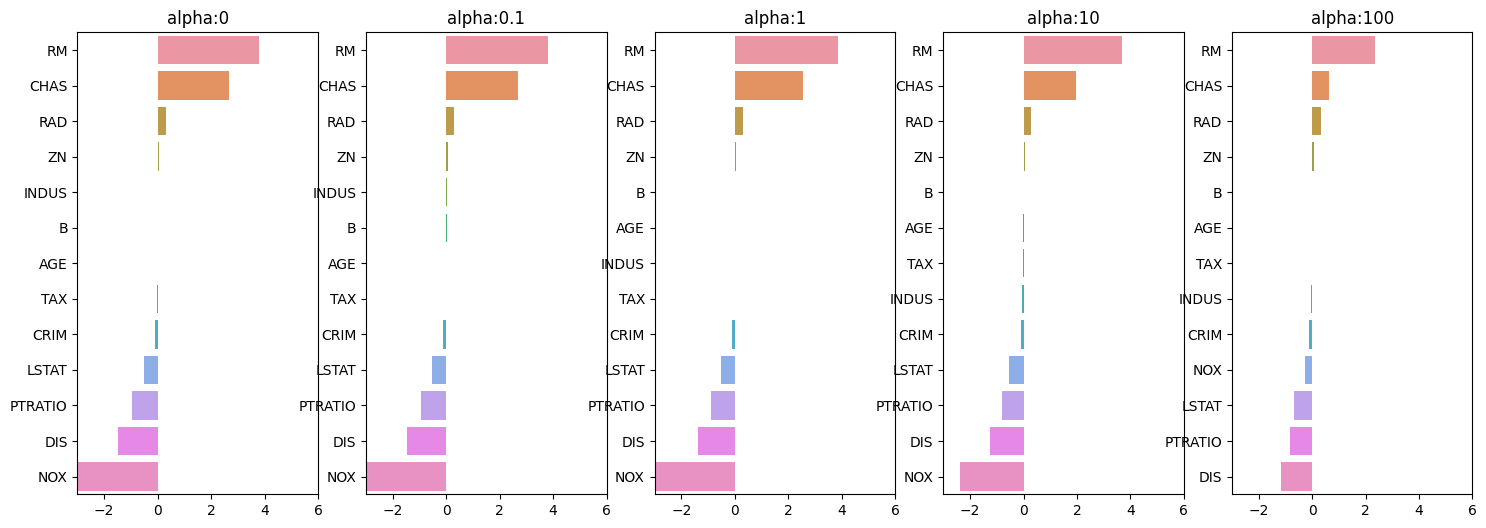

In [12]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 Dataframe 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정.
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha값에서의 회귀계수를 시각화. 회귀계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sb.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

> alpha값을 계속 증가시킬수록 회귀계수 값은 지속적으로 작아지고 있다.

In [13]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


> alpha값이 증가하면서 회귀계수가 지속적으로 작아지고 있다. 하지만 릿지회귀의 경우에는 회귀계수를 0으로 만들지 않는다.


*******************

## **Lasso Regualization**

L2규제(=Ridge regualization)가 회귀계수의 크기를 감소시키는데 반해, **L1규제(=Lasso regualization)는 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거.**

In [16]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀모델의 폴드 평균 RMSE를 출력하고 회귀계수들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge' : model=Ridge(alpha=param)
        elif model_name == 'Lasso' : model=Lasso(alpha=param)
        elif model_name == 'ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5 )
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0} 일때, 5 fold 세트의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval

In [17]:
# 라쏘에 사용될 alpha파라미터 값을 정의하고 get_linear_reg_eval함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07 일때, 5 fold 세트의 평균 RMSE:5.612
alpha 0.1 일때, 5 fold 세트의 평균 RMSE:5.615
alpha 0.5 일때, 5 fold 세트의 평균 RMSE:5.669
alpha 1 일때, 5 fold 세트의 평균 RMSE:5.776
alpha 3 일때, 5 fold 세트의 평균 RMSE:6.189


> alpha=0.07 일때 가장 좋은 RMSE값을 보여준다.

In [18]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


> alpha크기가 증가함에 따라 일부 피처의 회귀계수는 아예 0으로 바뀌고 있다. 

*************
## **ElasticNet**

__L2(Ridge) + L1(Lasso) 규제를 합한 것.__ <br>
엘라스틱넷은 라쏘회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해 alpha값에 따라 회귀계수 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2규제를 라쏘회귀에 추가한 것이다. <br>
하지만 수행시간이 오래걸린다는 단점이 있다. 

__ElasticNet의 주요 파라미터 : alpha와 l1_ratio__ <br>
**alpha = $a*L1 + b*L2$ 로 정의할 수 있다.** <br>
-> 이때, a는 L1규제 alpha, b는 L2규제 alpha

**l1_ratio = a/(a+b)** <br>
-> l1_ratio=0이면 a=0이므로 L2규제와 동일. <br>
-> l1_ratio=1이면 b=0이므로 L1규제와 동일.

In [19]:
# 엘라스틱넷에 사용될 alpha파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07 일때, 5 fold 세트의 평균 RMSE:5.542
alpha 0.1 일때, 5 fold 세트의 평균 RMSE:5.526
alpha 0.5 일때, 5 fold 세트의 평균 RMSE:5.467
alpha 1 일때, 5 fold 세트의 평균 RMSE:5.597
alpha 3 일때, 5 fold 세트의 평균 RMSE:6.068


> alpha=0.5일때, 가장 좋은 rmse 평균값을 갖는다.

In [21]:
sort_column = 'alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
